In [46]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

In [47]:
# Load the csv we retreived from Kaggle
sleep_df = pd.read_csv("../project-1/Resources/Sleep_health_and_lifestyle_dataset.csv")
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


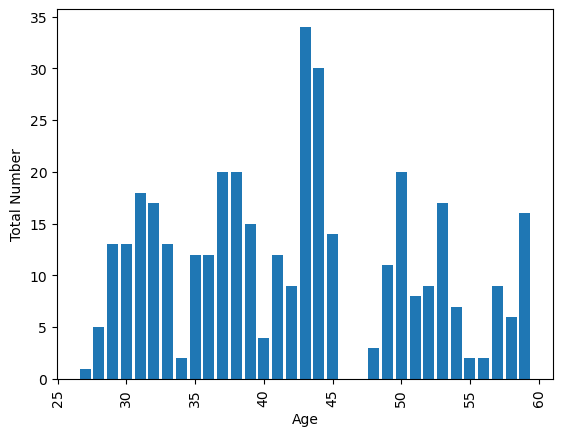

In [48]:
# Starting with age, we graphed the value counts to see the range we are working with
plt.bar(sleep_df["Age"].value_counts().index.values, sleep_df["Age"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Age")
plt.ylabel("Total Number")
plt.show()

In [49]:
# To make the data easier to graph, we used bins to sort ages
bins = [0,30,40,50,60]
labels = ["Younger than 30","30 to 40","40 to 50","50 to 60"]
sleep_df['Age Bracket'] = pd.cut(sleep_df['Age'], bins=bins, labels=labels, include_lowest=True)

age_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df.groupby(["Age Bracket"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df.groupby(["Age Bracket"])["Quality of Sleep"].mean(),
})
age_df

,Mean Sleep Duration,Mean Sleep Quality
Age Bracket,,
Younger than 30,6.915625,6.156250
30 to 40,7.032331,7.300752
40 to 50,6.776692,6.812030
50 to 60,8.019737,8.697368


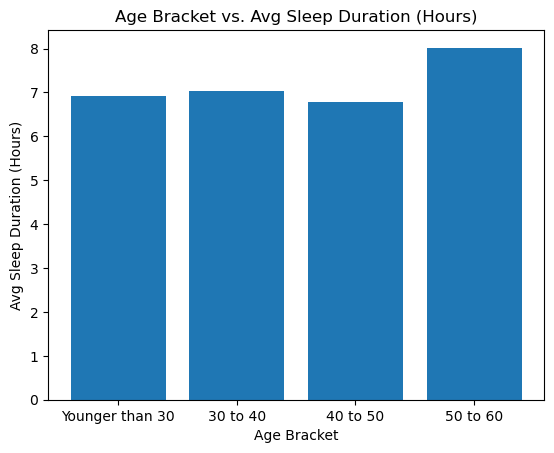

In [50]:
# Here is the age DataFrame in bar graph form, showing age versus average sleep duration
plt.bar(age_df.index.values, age_df["Mean Sleep Duration"])
plt.xlabel("Age Bracket")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Age Bracket vs. Avg Sleep Duration (Hours)")
plt.savefig("Output/Bar Graph: Age Bracket vs. Avg Sleep Duration (Hours).png")
plt.show()

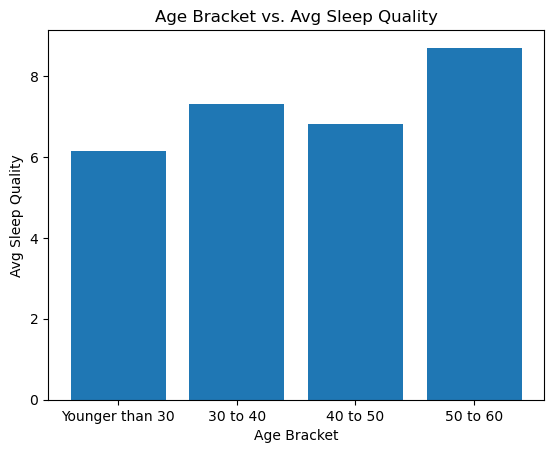

In [51]:
# And then here is the same for the sleep quality
plt.bar(age_df.index.values, age_df["Mean Sleep Quality"])
plt.xlabel("Age Bracket")
plt.ylabel("Avg Sleep Quality")
plt.title("Age Bracket vs. Avg Sleep Quality")
plt.savefig("Output/Bar Graph: Age Bracket vs. Avg Sleep Quality.png")
plt.show()

In [52]:
# Define a linear function to use for scatter plots
def linear(x,y,title,xlabel,ylabel):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-",label='y={:.2f}x+{:.2f}'.format(slope,intercept))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(fontsize=9)
    plt.savefig(f"Output/Scatter Plot: {title}.png")
    plt.show()
    print(f"The r value is: {rvalue}")

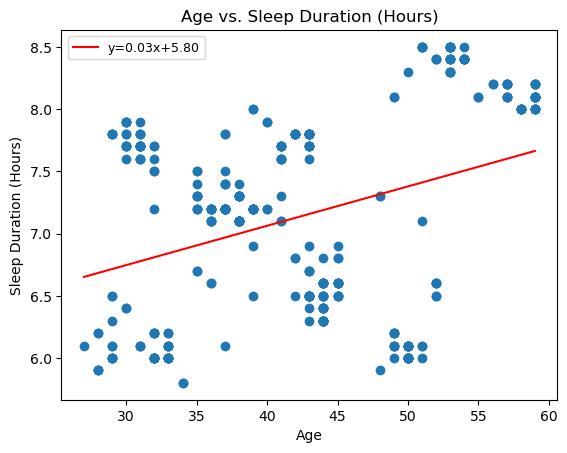

The r value is: 0.34470935816474396


In [53]:
linear(sleep_df["Age"], 
       sleep_df['Sleep Duration'], 
       "Age vs. Sleep Duration (Hours)", 
       "Age", "Sleep Duration (Hours)")

Not an extremely strong linear relationship is present, but older subjects tended to sleep longer than younger ones.

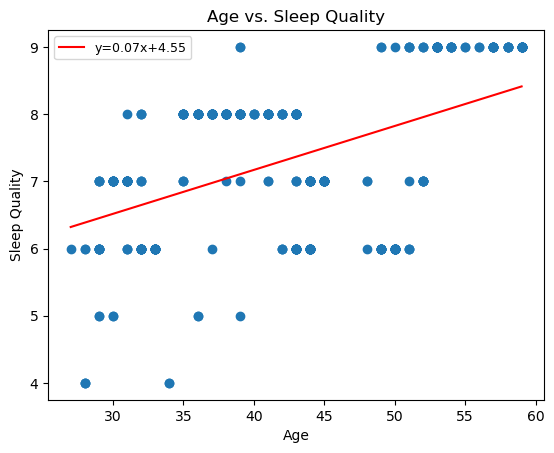

The r value is: 0.47373387616199036


In [54]:
linear(sleep_df["Age"], 
       sleep_df['Quality of Sleep'], 
       "Age vs. Sleep Quality", 
       "Age", "Sleep Quality")

There does not appear to be a strong linear relationship between age and sleep quality, but there is some sort of relationship present where older subjects reported higher quality of sleep.

In [55]:
# Next we will show how physical activity level affected sleep
sleep_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Age Bracket
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None,Younger than 30
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Younger than 30
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None,Younger than 30
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Younger than 30
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea,Younger than 30


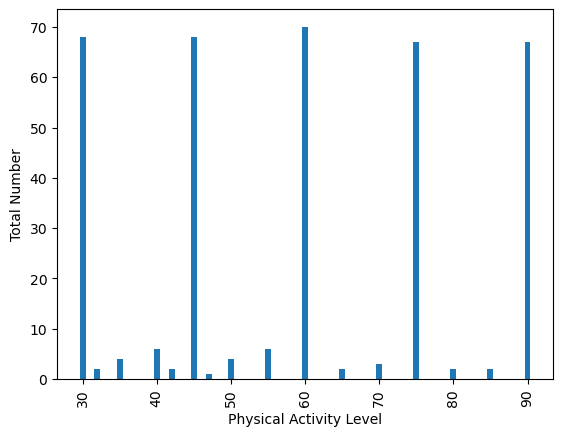

In [56]:
# Here is a graph of the value counts
plt.bar(sleep_df["Physical Activity Level"].value_counts().index.values, 
        sleep_df["Physical Activity Level"].value_counts().values)
plt.xticks(rotation = 90)
plt.xlabel("Physical Activity Level")
plt.ylabel("Total Number")
plt.show()

In [57]:
# Create bins that have rougly the same amount in each
bins = [30,40,50,60,80,100]
labels = ["30 to 40","40 to 50","50 to 60","60 to 80","80 to 100"]
sleep_df['Physical Activity Bracket'] = pd.cut(sleep_df['Physical Activity Level'], 
                                               bins=bins, labels=labels, include_lowest=True)

print(sleep_df["Physical Activity Bracket"].value_counts())

# Create a dataframe that shows mean sleep duration and quality
phys_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df.groupby(["Physical Activity Bracket"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df.groupby(["Physical Activity Bracket"])["Quality of Sleep"].mean(),
})
phys_df

30 to 40     80
50 to 60     76
40 to 50     75
60 to 80     74
80 to 100    69
Name: Physical Activity Bracket, dtype: int64


,Mean Sleep Duration,Mean Sleep Quality
Physical Activity Bracket,,
30 to 40,7.067500,7.037500
40 to 50,6.530667,6.520000
50 to 60,7.184211,7.868421
60 to 80,7.887838,8.013514
80 to 100,6.992754,7.130435


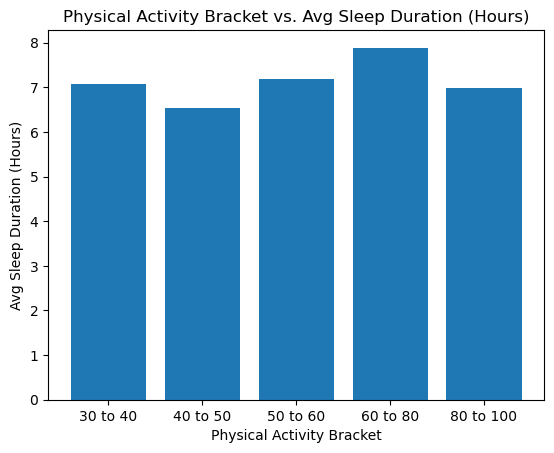

In [58]:
# Bar graph for Avg Sleep Duration
plt.bar(phys_df.index.values ,
        phys_df["Mean Sleep Duration"])
plt.xlabel("Physical Activity Bracket")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Physical Activity Bracket vs. Avg Sleep Duration (Hours)")
plt.savefig("Output/Bar Graph: Physical Activity Bracket vs. Avg Sleep Duration (Hours).png")
plt.show()

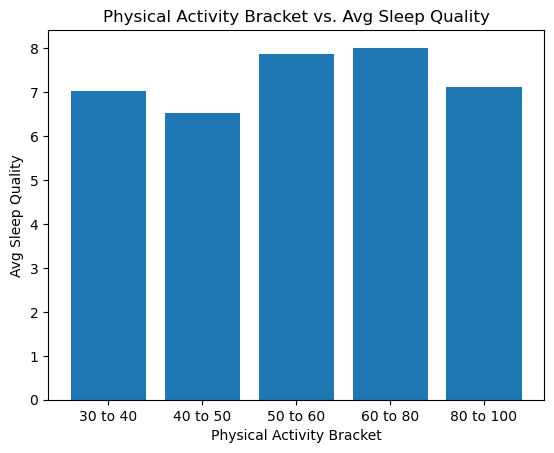

In [59]:
# Bar graph for Avg Sleep Duration
plt.bar(phys_df.index.values ,
        phys_df["Mean Sleep Quality"])
plt.xlabel("Physical Activity Bracket")
plt.ylabel("Avg Sleep Quality")
plt.title("Physical Activity Bracket vs. Avg Sleep Quality")
plt.savefig("Output/Bar Graph: Physical Activity Bracket vs. Avg Sleep Quality.png")
plt.show()

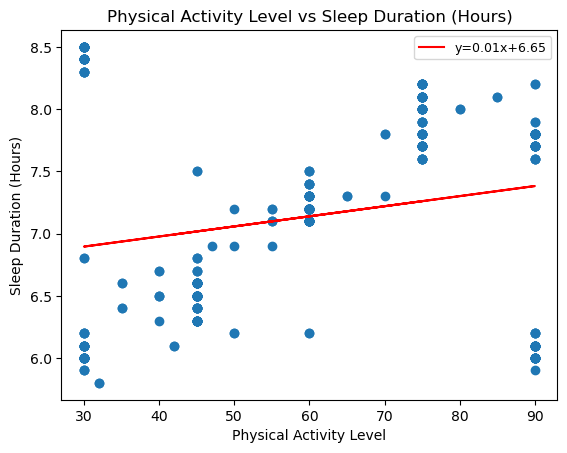

The r value is: 0.21236031472575864


In [60]:
# Scatter plot for physical activity level and sleep duration
linear(sleep_df['Physical Activity Level'],
       sleep_df['Sleep Duration'],
       "Physical Activity Level vs Sleep Duration (Hours)",
       "Physical Activity Level","Sleep Duration (Hours)")

Very weak linear relationship.

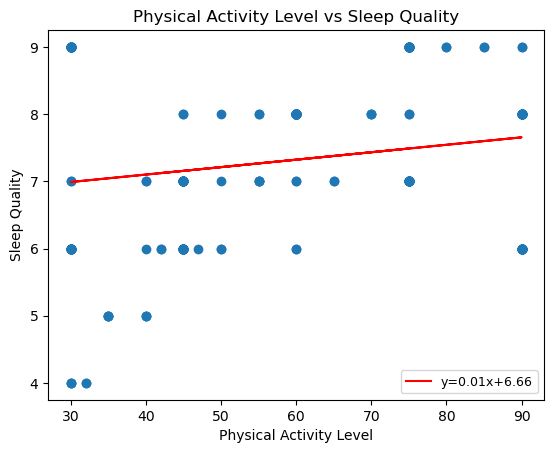

The r value is: 0.19289645493975302


In [61]:
# PAL and Sleep Quality
linear(sleep_df['Physical Activity Level'],
       sleep_df['Quality of Sleep'],
       "Physical Activity Level vs Sleep Quality",
       "Physical Activity Level","Sleep Quality")

Also a very weak linear relationship.

In [62]:
# Next, we will show stress
stress_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df.groupby(["Stress Level"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df.groupby(["Stress Level"])["Quality of Sleep"].mean(),
})
stress_df

,Mean Sleep Duration,Mean Sleep Quality
Stress Level,,
3,8.226761,8.971831
4,7.030000,7.671429
5,7.483582,7.895522
6,7.454348,7.000000
7,6.468000,6.000000
8,6.050000,5.857143


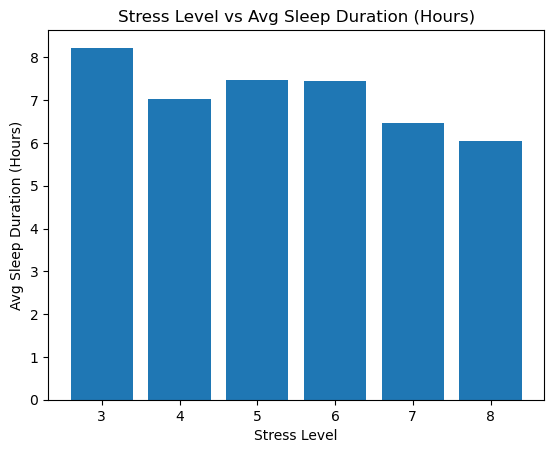

In [63]:
# Bar graph for sleep duration and stress
plt.bar(stress_df.index.values,
        stress_df['Mean Sleep Duration'])
plt.xlabel("Stress Level")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Stress Level vs Avg Sleep Duration (Hours)")
plt.savefig("Output/Bar Graph: Stress Level vs Avg Sleep Duration (Hours).png")
plt.show()

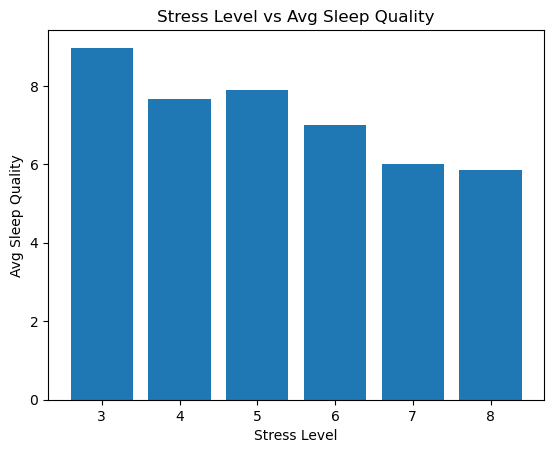

In [64]:
# Bar graph for sleep quality
plt.bar(stress_df.index.values,
        stress_df['Mean Sleep Quality'])
plt.xlabel("Stress Level")
plt.ylabel("Avg Sleep Quality")
plt.title("Stress Level vs Avg Sleep Quality")
plt.savefig("Output/Bar Graph: Stress Level vs Avg Sleep Quality.png")
plt.show()

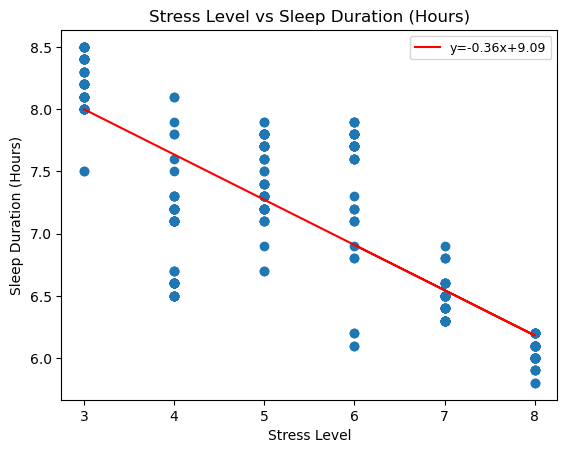

The r value is: -0.811023027894045


In [65]:
# Scatter plot for stress level and sleep duration
linear(sleep_df['Stress Level'], 
    sleep_df['Sleep Duration'], 
    "Stress Level vs Sleep Duration (Hours)",
    "Stress Level", "Sleep Duration (Hours)")

There is a strong negative correlation between stress level and sleep duration.

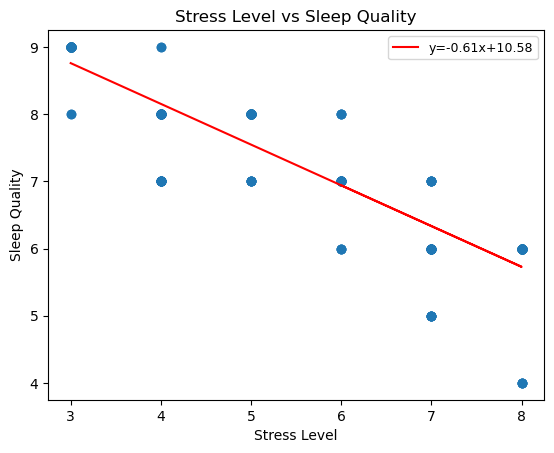

The r value is: -0.8987520310040436


In [66]:
linear(sleep_df['Stress Level'], 
    sleep_df['Quality of Sleep'], 
    "Stress Level vs Sleep Quality",
    "Stress Level", "Sleep Quality")

There is also a strong negeative correlation between stress level and reported quality of sleep.

In [67]:
# Finally, we will look at sleep disorders
print(sleep_df["Sleep Disorder"].value_counts())

None           219
Sleep Apnea     78
Insomnia        77
Name: Sleep Disorder, dtype: int64


In [68]:
#The mean duration and quality based on sleep disorders
sleep_disorder_df = pd.DataFrame({
    "Mean Sleep Duration": sleep_df.groupby(["Sleep Disorder"])["Sleep Duration"].mean(),
    "Mean Sleep Quality": sleep_df.groupby(["Sleep Disorder"])["Quality of Sleep"].mean(),
})
sleep_disorder_df

,Mean Sleep Duration,Mean Sleep Quality
Sleep Disorder,,
Insomnia,6.589610,6.532468
None,7.358447,7.625571
Sleep Apnea,7.032051,7.205128


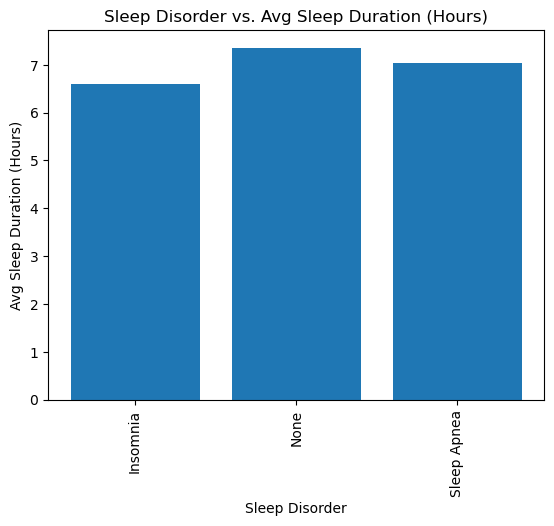

In [69]:
#Looking at duration of sleep vs sleep disorders
plt.bar(sleep_disorder_df.index.values ,
        sleep_disorder_df["Mean Sleep Duration"])
plt.xticks(rotation = 90)
plt.xlabel("Sleep Disorder")
plt.ylabel("Avg Sleep Duration (Hours)")
plt.title("Sleep Disorder vs. Avg Sleep Duration (Hours)")
plt.savefig("Output/Bar Graph: Sleep Disorder vs. Avg Sleep Duration (Hours).png")
plt.show()

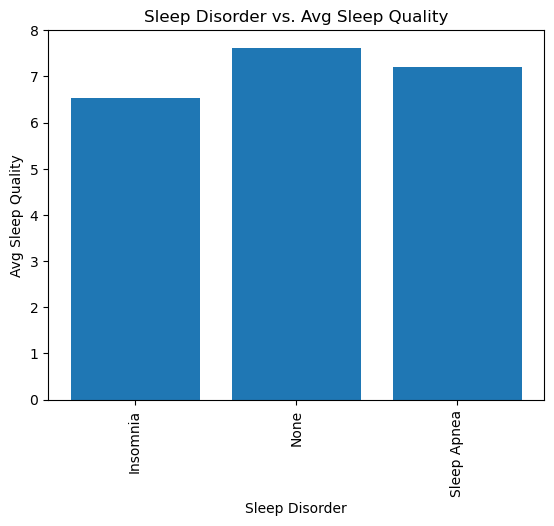

In [70]:
#Looking at quality of sleep vs sleep disorders
plt.bar(sleep_disorder_df.index.values ,
        sleep_disorder_df["Mean Sleep Quality"])
plt.xticks(rotation = 90)
plt.xlabel("Sleep Disorder")
plt.ylabel("Avg Sleep Quality")
plt.title("Sleep Disorder vs. Avg Sleep Quality")
plt.savefig("Output/Bar Graph: Sleep Disorder vs. Avg Sleep Quality.png")
plt.show()